In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [224]:
s=pd.read_csv("/content/malware.csv")

In [225]:
s

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,goodware
4461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,goodware
4462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,goodware
4463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,goodware


In [226]:
encoding={'goodware':0, 'malware':1}
s['Label']=s['Label'].map(encoding)

In [227]:
s

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
s=s.dropna()  #Remove rows with missing data

In [229]:
X=s.drop('Label',axis=1)
y=s['Label']
feature_names=X.columns

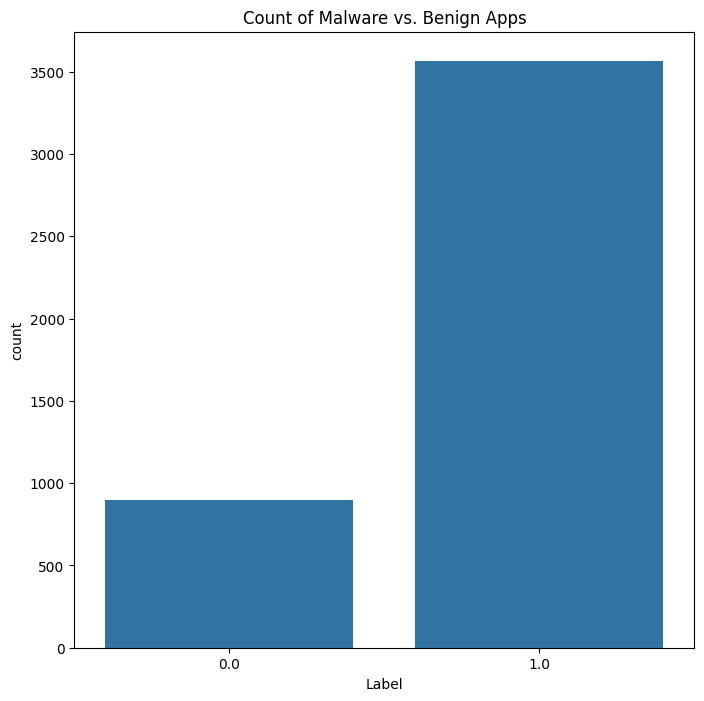

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Benign Apps vs Malware
plt.figure(figsize=(8, 8))
sns.countplot(x='Label', data=s)
plt.title('Count of Malware vs. Benign Apps')
plt.show()

FEATURE SELECTION METHODS

Getting Importances using Random Forest Classifier

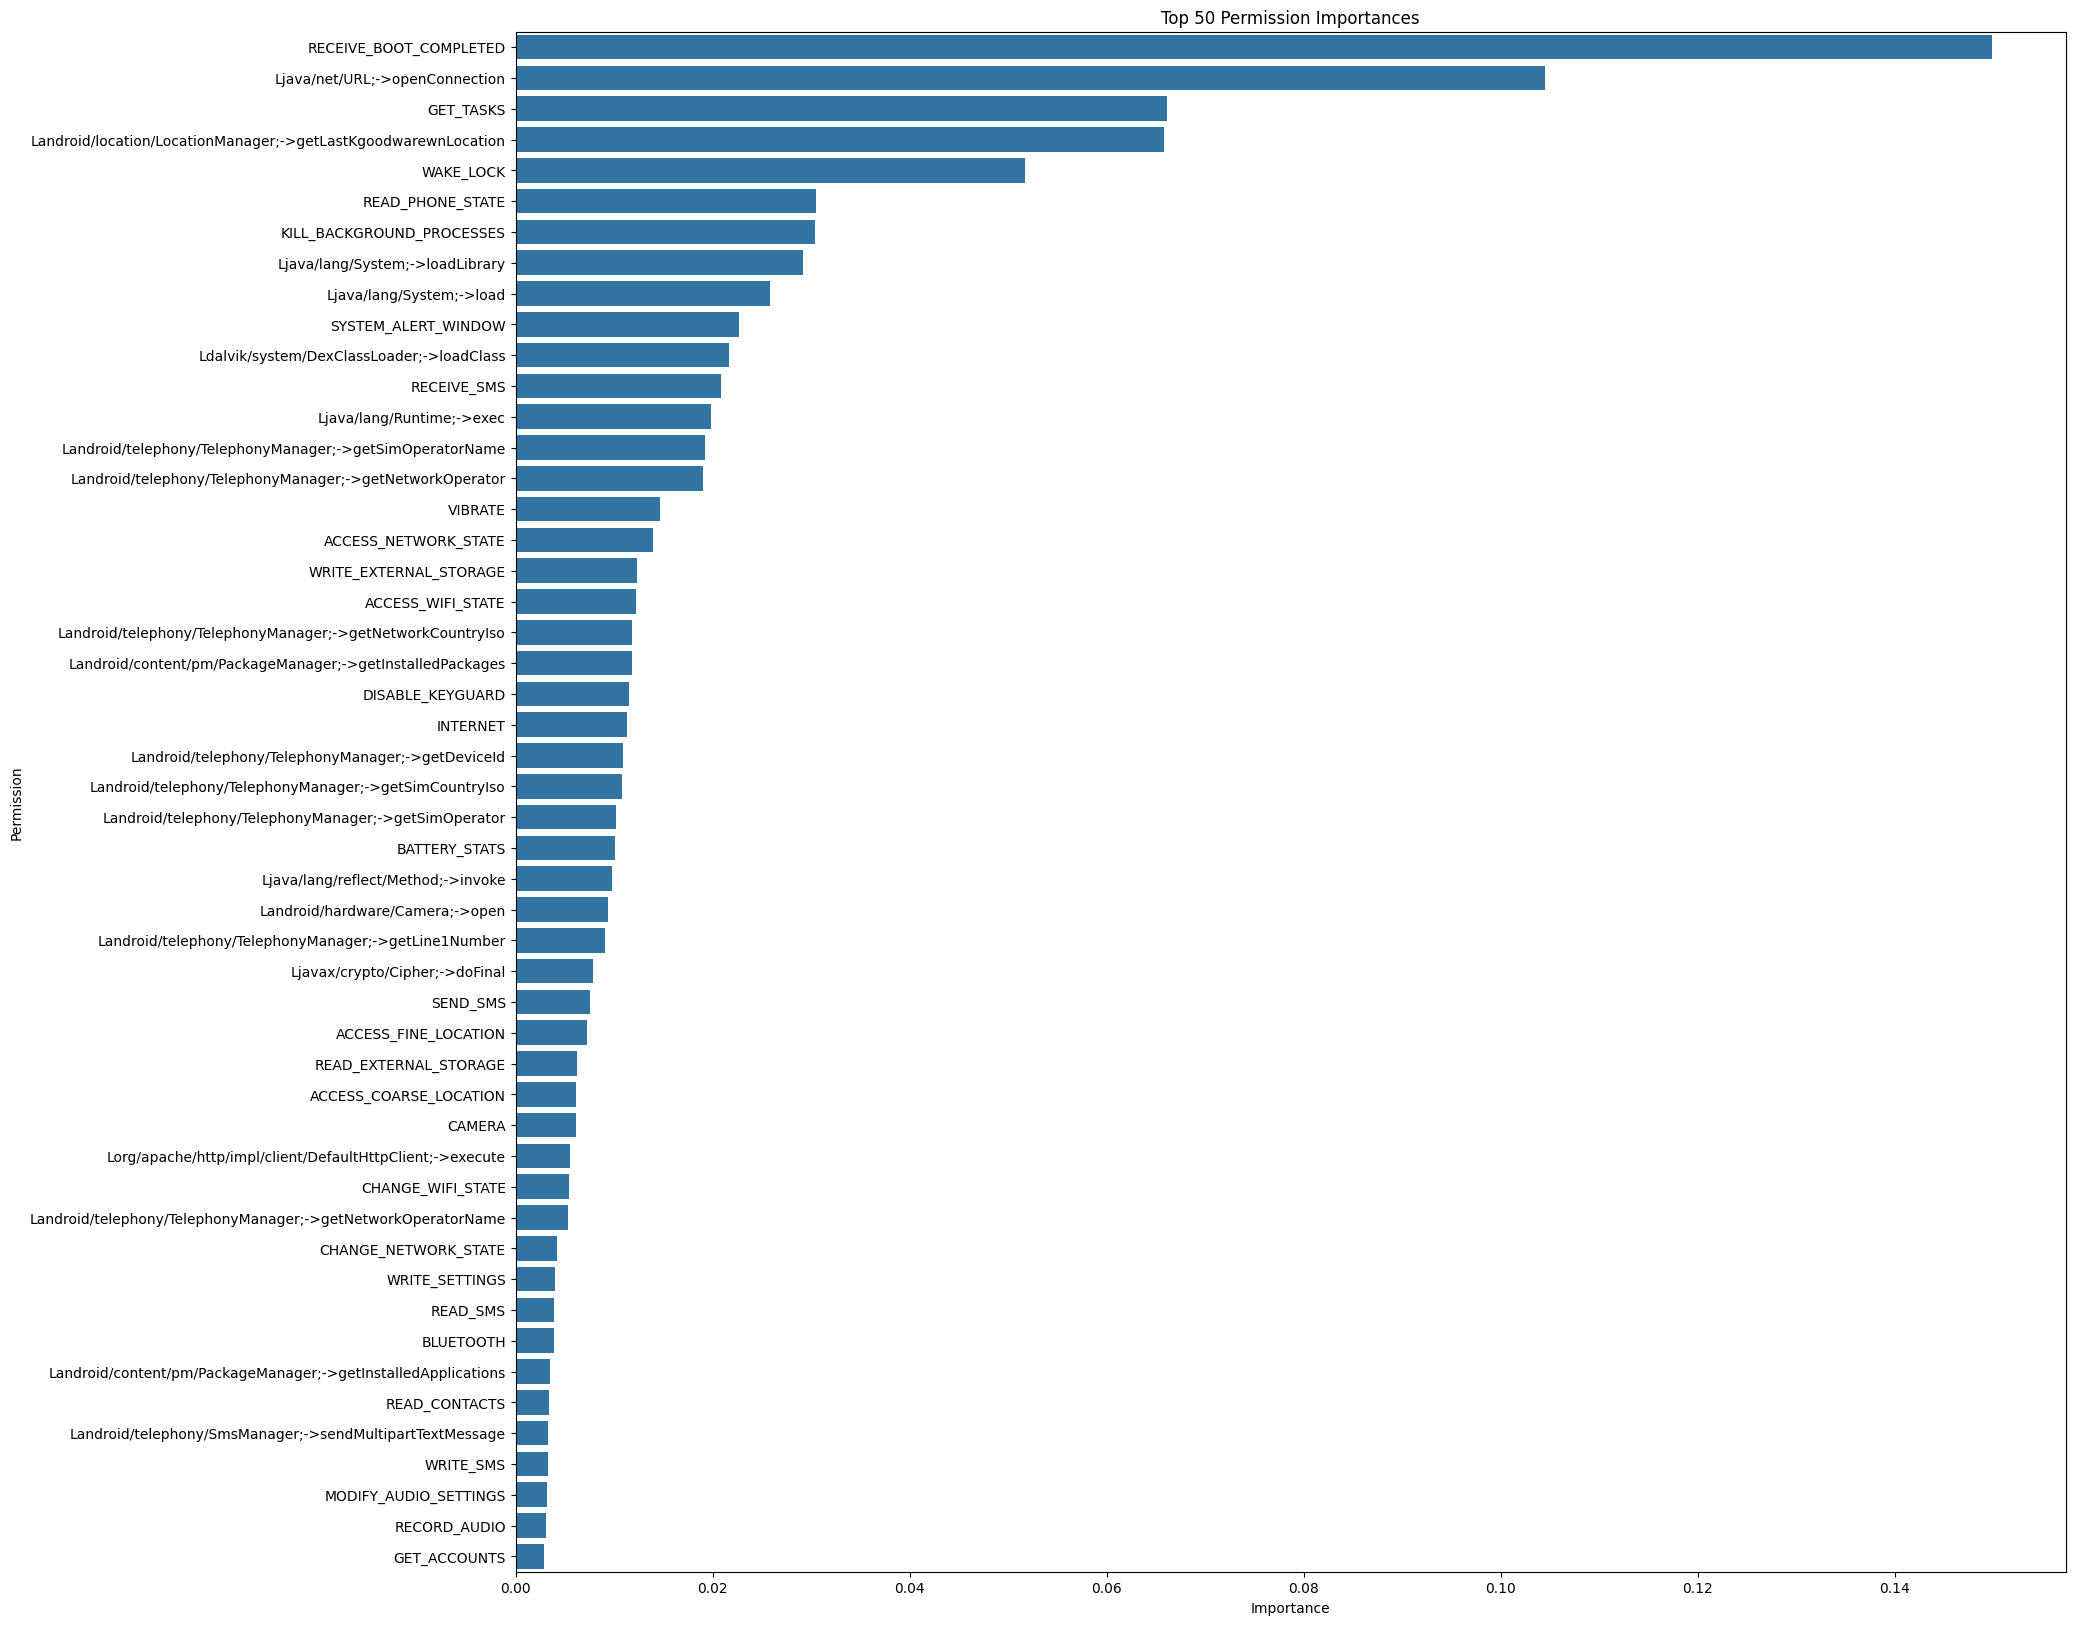

In [231]:
# Train a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get Feature Importances
importances = rf.feature_importances_
features = X.columns
rf_features = pd.DataFrame({'Permission': features, 'Importance': importances})

# Plot Feature Importances

plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Permission', data=rf_features.sort_values(by='Importance', ascending=False).head(50))
plt.title('Top 50 Permission Importances')
plt.show()


In [250]:
rf_features.sort_values(by='Importance', ascending=False)
rf_features.head(90)

,Permission,Importance
149,RECEIVE_BOOT_COMPLETED,0.149829
220,Ljava/net/URL;->openConnection,0.104441
86,GET_TASKS,0.066112
228,Landroid/location/LocationManager;->getLastKgo...,0.065837
191,WAKE_LOCK,0.051676
138,READ_PHONE_STATE,0.030507
100,KILL_BACKGROUND_PROCESSES,0.030355
219,Ljava/lang/System;->loadLibrary,0.029196
217,Ljava/lang/System;->load,0.025826
182,SYSTEM_ALERT_WINDOW,0.022679


In [251]:
rf_features=rf_features.loc[rf_features['Importance']>0.002]
print(rf_features)
X_rf=s.loc[:,rf_features['Permission']]

                                            Permission  Importance
149                             RECEIVE_BOOT_COMPLETED    0.149829
220                     Ljava/net/URL;->openConnection    0.104441
86                                           GET_TASKS    0.066112
228  Landroid/location/LocationManager;->getLastKgo...    0.065837
191                                          WAKE_LOCK    0.051676
138                                   READ_PHONE_STATE    0.030507
100                          KILL_BACKGROUND_PROCESSES    0.030355
219                    Ljava/lang/System;->loadLibrary    0.029196
217                           Ljava/lang/System;->load    0.025826
182                                SYSTEM_ALERT_WINDOW    0.022679
218          Ldalvik/system/DexClassLoader;->loadClass    0.021619
152                                        RECEIVE_SMS    0.020853
216                          Ljava/lang/Runtime;->exec    0.019890
237  Landroid/telephony/TelephonyManager;->getSimOp...    0.01

In [252]:
X_rf

,RECEIVE_BOOT_COMPLETED,Ljava/net/URL;->openConnection,GET_TASKS,Landroid/location/LocationManager;->getLastKgoodwarewnLocation,WAKE_LOCK,READ_PHONE_STATE,KILL_BACKGROUND_PROCESSES,Ljava/lang/System;->loadLibrary,Ljava/lang/System;->load,SYSTEM_ALERT_WINDOW,...,WRITE_SMS,MODIFY_AUDIO_SETTINGS,RECORD_AUDIO,GET_ACCOUNTS,Landroid/media/AudioRecord;->startRecording,USE_CREDENTIALS,PROCESS_OUTGOING_CALLS,Landroid/telephony/SmsManager;->sendTextMessage,Landroid/hardware/Camera;->takePicture,CALL_PHONE
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4461,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4463,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Getting Importances using Logistic Regression

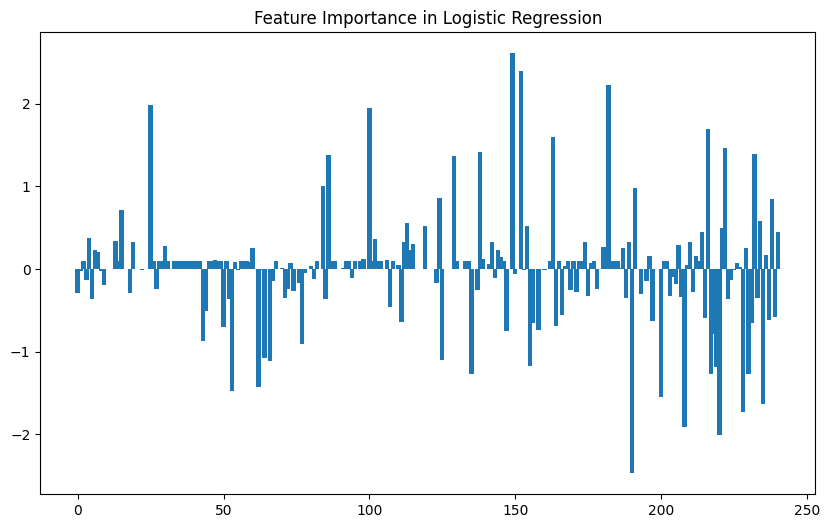

In [253]:
# Train a Logistic Regression model
lr = LogisticRegression()
lr.fit(X, y)

# Get Feature Importances
lr_importances = lr.coef_[0]  # Logistic Regression coefficients
features = X.columns
lr_features= pd.DataFrame({'Permission': features, 'Importance': lr_importances})

# Plot Feature Importances

plt.figure(figsize=(10, 6))
plt.bar(range(len(lr_importances)), lr_importances,width=1.5)
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [254]:
lr_features.sort_values(by='Importance', ascending=False)

,Permission,Importance
149,RECEIVE_BOOT_COMPLETED,2.607462
152,RECEIVE_SMS,2.387968
182,SYSTEM_ALERT_WINDOW,2.227841
25,BATTERY_STATS,1.988137
100,KILL_BACKGROUND_PROCESSES,1.943975
...,...,...
235,Landroid/telephony/TelephonyManager;->getNetwo...,-1.636771
228,Landroid/location/LocationManager;->getLastKgo...,-1.724220
208,WRITE_SETTINGS,-1.912476
220,Ljava/net/URL;->openConnection,-2.007310


In [255]:
lr_features=lr_features.loc[(lr_features['Importance']>0.3) | (lr_features['Importance']<-0.3)]
print(lr_features.shape)
X_lr=s.loc[:,lr_features['Permission']]

(77, 2)


In [256]:
X_lr

,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_SUPERUSER,ACCESS_WIFI_STATE,ADD_VOICEMAIL,BATTERY_STATS,BLUETOOTH,BLUETOOTH_ADMIN,BROADCAST_STICKY,C2D_MESSAGE,...,Landroid/content/pm/PackageManager;->getInstalledApplications,Landroid/content/pm/PackageManager;->getInstalledPackages,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4461,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4462,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4463,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Determining Mutual Information

In [257]:
mi_scores = mutual_info_classif(X, y)

In [258]:
mi_features = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)
print(mi_features)

RECEIVE_BOOT_COMPLETED                                            0.237930
Ljava/net/URL;->openConnection                                    0.216322
Landroid/location/LocationManager;->getLastKgoodwarewnLocation    0.174668
GET_TASKS                                                         0.166693
KILL_BACKGROUND_PROCESSES                                         0.114031
                                                                    ...   
READ_SETTINGS                                                     0.000000
READ_PROFILE                                                      0.000000
READ_OWNER_DATA                                                   0.000000
READ_MESSAGES                                                     0.000000
REORDER_TASKS                                                     0.000000
Length: 241, dtype: float64


In [259]:
mi_features=pd.DataFrame({'Permission':feature_names,'Importance':mi_scores})


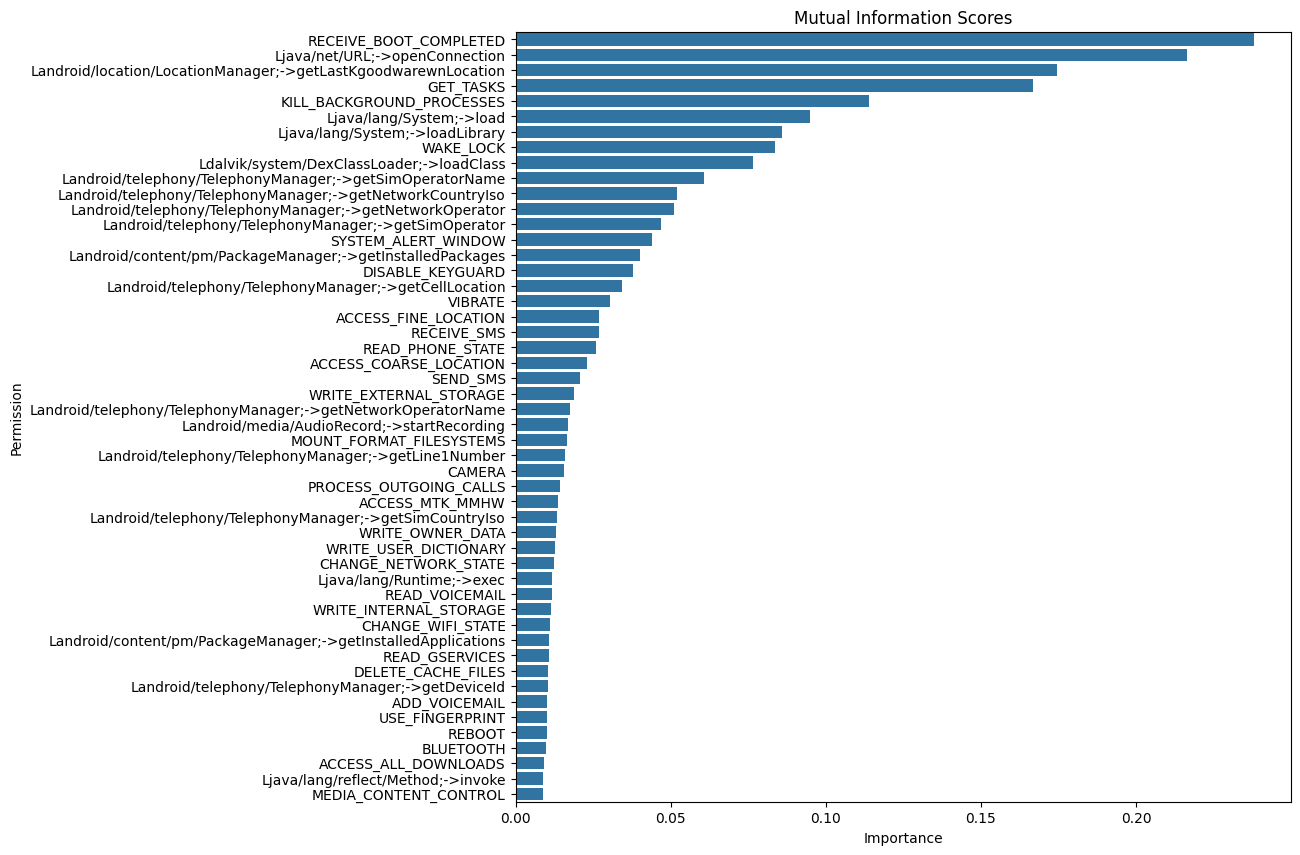

In [260]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Permission', data=mi_features.sort_values(by='Importance', ascending=False).head(50) )
plt.title('Mutual Information Scores')
plt.show()


In [261]:
mi_features=mi_features.loc[mi_features['Importance'] > 0.005]
print(mi_features)
X_mi=s.loc[:,mi_features['Permission']]

                                            Permission  Importance
0                                 ACCESS_ALL_DOWNLOADS    0.009255
3                               ACCESS_COARSE_LOCATION    0.022885
5                                 ACCESS_FINE_LOCATION    0.026917
7                                 ACCESS_MOCK_LOCATION    0.006513
8                                      ACCESS_MTK_MMHW    0.013683
..                                                 ...         ...
234  Landroid/telephony/TelephonyManager;->getNetwo...    0.017455
235  Landroid/telephony/TelephonyManager;->getNetwo...    0.051907
236  Landroid/telephony/TelephonyManager;->getSimOp...    0.046816
237  Landroid/telephony/TelephonyManager;->getSimOp...    0.060686
238  Landroid/telephony/TelephonyManager;->getSimCo...    0.013432

[80 rows x 2 columns]


In [262]:
X_mi

,ACCESS_ALL_DOWNLOADS,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_SUPERUSER,ACCESS_SURFACE_FLINGER,ADD_VOICEMAIL,ANT_ADMIN,BIND_ACCESSIBILITY_SERVICE,...,Landroid/telephony/TelephonyManager;->getDeviceId,Landroid/content/pm/PackageManager;->getInstalledApplications,Landroid/content/pm/PackageManager;->getInstalledPackages,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4462,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(X_rf,y,test_size=0.20)
X_train_lr,X_test_lr,y_train_lr,y_test_lr=train_test_split(X_lr,y,test_size=0.20)
X_train_mi,X_test_mi,y_train_mi,y_test_mi=train_test_split(X_mi,y,test_size=0.20)


In [320]:
datasets = {
    "Random Classifier Importances":(X_train_rf, X_test_rf, y_train_rf, y_test_rf),
    "Logistic Regression Importances":(X_train_lr, X_test_lr, y_train_lr, y_test_lr),
    "Mutual Information":(X_train_mi, X_test_mi, y_train_mi, y_test_mi)
}

1. Logistic Regreesion Model

In [321]:
model = LogisticRegression()

# To store accuracies
accuracies_lr = []

for key, (X_train, X_test, y_train, y_test) in datasets.items():
  print(f'{key}:\n')
  # Fit the model
  model.fit(X_train, y_train)

  # Make predictions
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  cv_scores = cross_val_score(model, X_train, y_train, cv=5)
  accuracies_lr.append(accuracy)
  print(f'Cross-validation scores: {cv_scores}')
  print("Mean CV accuracy:", cv_scores.mean())
  report = classification_report(y_test, y_pred)
  print(report)


Random Classifier Importances:

Accuracy: 0.9888017917133258
Cross-validation scores: [0.97762238 0.98459384 0.98179272 0.97759104 0.98319328]
Mean CV accuracy: 0.9809586491939433
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       194
         1.0       0.99      0.99      0.99       699

    accuracy                           0.99       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.99      0.99      0.99       893

Logistic Regression Importances:

Accuracy: 0.9843225083986562
Cross-validation scores: [0.98321678 0.98179272 0.9789916  0.9859944  0.98319328]
Mean CV accuracy: 0.9826377544024603
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       197
         1.0       0.99      0.99      0.99       696

    accuracy                           0.98       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.98      0.98      

2. Neural Network

In [322]:
# To store accuracies
accuracies_nn = []

for key, (X_train, X_test, y_train, y_test) in datasets.items():
  print(f'\n{key}:\n')

  #Defining the Neural Network
  model=Sequential(
    [
        Dense(64,input_dim=X_train.shape[1],activation='relu'),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
  )

  # Fit the model
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

  y_pred=model.predict(X_test)
  y_pred=(y_pred>0.5).astype(int)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  accuracies_nn.append(accuracy)

  report = classification_report(y_test, y_pred)
  print(report)

  cm=confusion_matrix(y_test,y_pred)
  print(cm)



Random Classifier Importances:

Epoch 1/10
90/90 [==============================] - 2s 8ms/step - loss: 0.2510 - accuracy: 0.9219 - val_loss: 0.0765 - val_accuracy: 0.9650
Epoch 2/10
90/90 [==============================] - 1s 6ms/step - loss: 0.0589 - accuracy: 0.9762 - val_loss: 0.0580 - val_accuracy: 0.9706
Epoch 3/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9814 - val_loss: 0.0516 - val_accuracy: 0.9776
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.0438 - val_accuracy: 0.9888
Epoch 5/10
90/90 [==============================] - 0s 5ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0404 - val_accuracy: 0.9902
Epoch 6/10
90/90 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9947 - val_loss: 0.0434 - val_accuracy: 0.9902
Epoch 7/10
90/90 [==============================] - 1s 6ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0469 - val_accu

3. Naive Bayes

In [323]:
model = BernoulliNB()

In [324]:
# To store accuracies
accuracies_nb = []

for key, (X_train, X_test, y_train, y_test) in datasets.items():
  print(f'\n{key}:\n')

  # Fit the model
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)


  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  accuracies_nb.append(accuracy)

  report = classification_report(y_test, y_pred)
  print(report)

  cm=confusion_matrix(y_test,y_pred)
  print(cm)




Random Classifier Importances:

Accuracy: 0.9451287793952967
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       194
         1.0       0.95      0.98      0.97       699

    accuracy                           0.95       893
   macro avg       0.93      0.90      0.92       893
weighted avg       0.94      0.95      0.94       893

[[161  33]
 [ 16 683]]

Logistic Regression Importances:

Accuracy: 0.9641657334826428
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       197
         1.0       0.98      0.97      0.98       696

    accuracy                           0.96       893
   macro avg       0.94      0.96      0.95       893
weighted avg       0.96      0.96      0.96       893

[[185  12]
 [ 20 676]]

Mutual Information:

Accuracy: 0.9675251959686451
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92       167
         1.0  

4. KNN

In [325]:
model =KNeighborsClassifier(n_neighbors=5)

In [326]:

accuracies_knn = []

for key, (X_train, X_test, y_train, y_test) in datasets.items():
  print(f'\n{key}:\n')

  # Fit the model
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)


  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  accuracies_knn.append(accuracy)

  report = classification_report(y_test, y_pred)
  print(report)

  cm=confusion_matrix(y_test,y_pred)
  print(cm)




Random Classifier Importances:

Accuracy: 0.986562150055991
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       194
         1.0       0.99      0.99      0.99       699

    accuracy                           0.99       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.99      0.99      0.99       893

[[186   8]
 [  4 695]]

Logistic Regression Importances:

Accuracy: 0.9843225083986562
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       197
         1.0       0.98      1.00      0.99       696

    accuracy                           0.98       893
   macro avg       0.98      0.97      0.98       893
weighted avg       0.98      0.98      0.98       893

[[186  11]
 [  3 693]]

Mutual Information:

Accuracy: 0.986562150055991
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       167
         1.0    

5. Random Forest Classifier

In [327]:
rf=RandomForestClassifier()

In [329]:
accuracies_rfc = []

for key, (X_train, X_test, y_train, y_test) in datasets.items():
  print(f'\n{key}:\n')

  # Fit the model
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)


  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  accuracies_rfc.append(accuracy)

  report = classification_report(y_test, y_pred)
  print(report)

  cm=confusion_matrix(y_test,y_pred)
  print(cm)



Random Classifier Importances:

Accuracy: 0.9921612541993281
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       194
         1.0       0.99      1.00      0.99       699

    accuracy                           0.99       893
   macro avg       0.99      0.99      0.99       893
weighted avg       0.99      0.99      0.99       893

[[190   4]
 [  3 696]]

Logistic Regression Importances:

Accuracy: 0.9932810750279956
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       197
         1.0       0.99      1.00      1.00       696

    accuracy                           0.99       893
   macro avg       0.99      0.99      0.99       893
weighted avg       0.99      0.99      0.99       893

[[193   4]
 [  2 694]]

Mutual Information:

Accuracy: 0.9944008958566629
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       167
         1.0  

6. SVM

In [330]:
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [331]:
accuracies_svm = []

for key, (X_train, X_test, y_train, y_test) in datasets.items():
  print(f'\n{key}:\n')

  # Fit the model
  model_svm.fit(X_train, y_train)

  y_pred = model_svm.predict(X_test)


  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  accuracies_svm.append(accuracy)

  report = classification_report(y_test, y_pred)
  print(report)

  cm=confusion_matrix(y_test,y_pred)
  print(cm)



Random Classifier Importances:

Accuracy: 0.9876819708846585
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       194
         1.0       0.99      0.99      0.99       699

    accuracy                           0.99       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.99      0.99      0.99       893

[[187   7]
 [  4 695]]

Logistic Regression Importances:

Accuracy: 0.9932810750279956
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       197
         1.0       1.00      1.00      1.00       696

    accuracy                           0.99       893
   macro avg       0.99      0.99      0.99       893
weighted avg       0.99      0.99      0.99       893

[[194   3]
 [  3 693]]

Mutual Information:

Accuracy: 0.9798432250839866
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       167
         1.0  

Comparing the different accuracies for different models with different feature selection methods.

In [342]:
data={
    'Logistic Regression':accuracies_lr,
    'Neural Network':accuracies_nn,
    'Naive Bayes':accuracies_nb,
    'KNN':accuracies_knn,
    'Random Forest Classifier':accuracies_rfc,
    'SVM':accuracies_svm
}


In [347]:
accuracy=pd.DataFrame(data,index=["Random Classifier Importance","Logistic Importance","Mutual Information"])

accuracy

,Logistic Regression,Neural Network,Naive Bayes,KNN,Random Forest Classifier,SVM
Random Classifier Importance,0.9888018,0.9921613,0.9451288,0.9865622,0.9921613,0.9876820
Logistic Importance,0.9843225,0.9921613,0.9641657,0.9843225,0.9932811,0.9932811
Mutual Information,0.9787234,0.9932811,0.9675252,0.9865622,0.9944009,0.9798432


In [348]:
accuracy.max().max()

0.9944008958566629